In [1]:
import pandas as pd
import numpy as np

As the data file donot have column name so we manually added them.

In [2]:
cols = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location',
        'wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore',
        'stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [3]:
cars = pd.read_csv('imports-85.data',names=cols)

In [4]:
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
cars = cars.replace('?',np.nan)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [7]:
cars = cars.astype({'normalized_losses':'float64','bore':'float64','stroke':'float64','horsepower':'float64',
             'peak_rpm':'float64','price':'float64'})

Above we convert the numerical data columns to float dtype.

In [8]:
c1 = ['normalized_losses','bore','stroke','horsepower','peak_rpm']
for c in c1:
    cars[c] = cars[c].fillna(cars[c].mean())

In [9]:
cars = cars.dropna()

In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized_losses  199 non-null    float64
 2   make               199 non-null    object 
 3   fuel_type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num_doors          199 non-null    object 
 6   body_style         199 non-null    object 
 7   drive_wheels       199 non-null    object 
 8   engine_location    199 non-null    object 
 9   wheel_base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb_weight        199 non-null    int64  
 14  engine_type        199 non-null    object 
 15  num_cylinders      199 non-null    object 
 16  engine_size        199 non

In [11]:
cars['num_doors'] = cars['num_doors'].str.replace('four','4').str.replace('two','2').astype('float64')

In [12]:
cars2 = cars.copy()

Normalizing the numerical data columns with the value between 0 to 1, except the target column that is 'price'.

In [4]:
numeric_cols = ['symboling','normalized_losses','num_doors','wheel_base','length','width','height','curb_weight','engine_size',
                'bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']
for c in numeric_cols:
    minimum = cars[c].min()
    maximum = cars[c].max()
    cars2[c] = cars[c].apply(lambda x: (x-minimum)/(maximum-minimum))

NameError: name 'cars' is not defined

In [14]:
cars2 = cars2.reset_index()

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [16]:
def knn_train_test(training_col,target_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_data = rand_df[0:round(0.75*df.shape[0])]
    test_data = rand_df[round(0.75*df.shape[0]):]
    knn = KNeighborsRegressor()
    knn.fit(train_data[[training_col]],train_data[target_col],)
    predictions = knn.predict(test_data[[training_col]])
    return(np.sqrt(mean_squared_error(predictions,test_data[target_col])))   

In [2]:
def kc_train_test(training_col,target_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_data = rand_df[0:round(0.75*df.shape[0])]
    test_data = rand_df[round(0.75*df.shape[0]):]
    KMeans = KMeans(n_clusters=num_clusters)
    KMeans.fit(train_data[[training_col]],train_data[target_col],)
    predictions = KMeans.predict(test_data[[training_col]])
    return(np.sqrt(mean_squared_error(predictions,test_data[target_col])))   

In [3]:
rmses = list()
for col in numeric_cols:
    rmses.append(kc_train_test(col,'price',cars2))

NameError: name 'numeric_cols' is not defined

In [18]:
rmses

[7511.105335914282,
 5842.837786007754,
 8277.485399129375,
 4519.933559954173,
 4024.2425697266312,
 4016.1628599448004,
 6912.3253644486385,
 3768.6773004862066,
 2967.981217056469,
 5238.308311583043,
 6149.043932059682,
 5225.453079609462,
 3388.210358876792,
 6894.913579095825,
 3784.3625142419955,
 3517.983166986448]

In [19]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

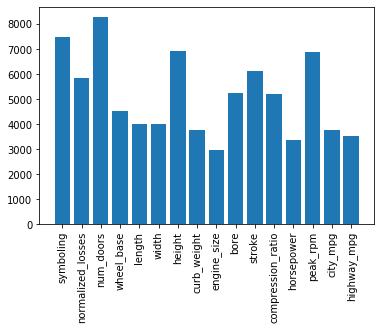

In [20]:
plt.bar(numeric_cols,rmses)
plt.xticks(rotation='vertical')

From above graph it is shown that 'curb_weight' , 'engine_size' and 'highway_mpg' has lowest rmse value.  

In [21]:
def knn_train_test2(training_col,target_col,df,k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_data = rand_df[0:round(0.75*df.shape[0])]
    test_data = rand_df[round(0.75*df.shape[0]):]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data[[training_col]],train_data[target_col],)
    predictions = knn.predict(test_data[[training_col]])
    return(np.sqrt(mean_squared_error(predictions,test_data[target_col])))

In [22]:
rmses2 = {}
k_values = [1,3,5,7,9]
for col in numeric_cols:
    d = {}
    for k in k_values:
        d[k] = knn_train_test2(col,'price',cars2,k)
    rmses2[col] = d 

Above is the code to get rmse value for each column and for every k value in (1,3,5,7,9).

In [23]:
rmses2

{'symboling': {1: 7320.124250311603,
  3: 7486.694615412362,
  5: 7511.105335914282,
  7: 7175.722274532683,
  9: 7158.853470569601},
 'normalized_losses': {1: 9927.224774326407,
  3: 6177.426360548541,
  5: 5842.837786007754,
  7: 6205.423672292897,
  9: 6536.771112448654},
 'num_doors': {1: 8523.61451967415,
  3: 9621.778693036844,
  5: 8277.485399129375,
  7: 7868.048155388362,
  9: 7715.9694988165065},
 'wheel_base': {1: 2645.068811959341,
  3: 3549.1140581527916,
  5: 4519.933559954173,
  7: 4703.904512861889,
  9: 4383.736174165977},
 'length': {1: 3755.792576807191,
  3: 3782.260166443692,
  5: 4024.2425697266312,
  7: 4534.929775394003,
  9: 4329.941950627337},
 'width': {1: 4576.20529041257,
  3: 3958.6383467045835,
  5: 4016.1628599448004,
  7: 4097.5738778064315,
  9: 4036.291994050303},
 'height': {1: 8746.32092596653,
  3: 6647.022858560231,
  5: 6912.3253644486385,
  7: 7085.304604573599,
  9: 6725.309819711737},
 'curb_weight': {1: 4105.252304061226,
  3: 3495.8700468473

In [24]:
y_data = []
for k1,v in rmses2.items():
    l=[]
    for k2,rmse in v.items():
        l.append(rmse)
    y_data.append(l)
        

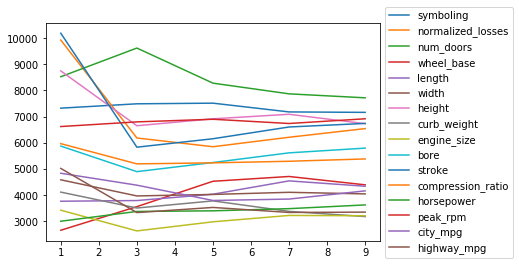

In [25]:
%matplotlib inline
for element in y_data:
    plt.plot(k_values,element)
plt.legend(numeric_cols,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [26]:
def knn_train_test3(training_cols,target_col,df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_data = rand_df[0:round(0.75*df.shape[0])]
    test_data = rand_df[round(0.75*df.shape[0]):]
    knn = KNeighborsRegressor()
    knn.fit(train_data[training_cols],train_data[target_col],)
    predictions = knn.predict(test_data[training_cols])
    return(np.sqrt(mean_squared_error(predictions,test_data[target_col])))

In [27]:
mv2 = knn_train_test3(['engine_size','horsepower'],'price',cars2)
mv3 = knn_train_test3(['engine_size','horsepower','highway_mpg'],'price',cars2)
mv4 = knn_train_test3(['engine_size','horsepower','highway_mpg','city_mpg'],'price',cars2)
mv5 = knn_train_test3(['engine_size','horsepower','highway_mpg','city_mpg','curb_weight'],'price',cars2)
print('best 2:',mv2,'best 3:',mv3,'best 4:',mv4,'best 5:',mv5)

best 2: 2495.5072170602916 best 3: 2513.4507427041412 best 4: 2760.0957234125053 best 5: 2713.289672113908


In [28]:
def knn_train_test4(training_cols,target_col,df,k):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_data = rand_df[0:round(0.75*df.shape[0])]
    test_data = rand_df[round(0.75*df.shape[0]):]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_data[training_cols],train_data[target_col],)
    predictions = knn.predict(test_data[training_cols])
    return(np.sqrt(mean_squared_error(predictions,test_data[target_col])))

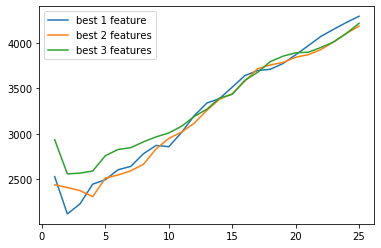

In [33]:
result1=[]
result2=[]
result3=[]
for k in range(1,26):
    result1.append(knn_train_test4(['engine_size','horsepower'],'price',cars2,k)) 
    result2.append(knn_train_test4(['engine_size','horsepower','highway_mpg'],'price',cars2,k))
    result3.append(knn_train_test4(['engine_size','horsepower','highway_mpg','city_mpg'],'price',cars2,k))
plt.plot(range(1,26),result1)
plt.plot(range(1,26),result2)
plt.plot(range(1,26),result3)
plt.legend(['best 1 feature','best 2 features','best 3 features'])

As per according to graph best k value is around 3 or 4. It does not vary much as we increase the number of features. K value is directly proportional to rmse. 

Final statement 

features to be considered - Engine size and horsepower
K value - 3
